In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
titanic = sns.load_dataset('titanic')

In [5]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
titanic.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Data Cleaning

In [10]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [12]:
print(titanic['age'].isnull().sum())

0


In [13]:
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [15]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

In [16]:
titanic.drop(columns=['deck'], inplace=True)

In [18]:
titanic['embark_town'] = titanic['embark_town'].fillna('Unknown')

In [19]:
print(titanic['embark_town'].isnull().sum())

0


In [20]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

EDA


<ipython-input-21-462f486e9fb7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=titanic, x='survived', palette='Set2')


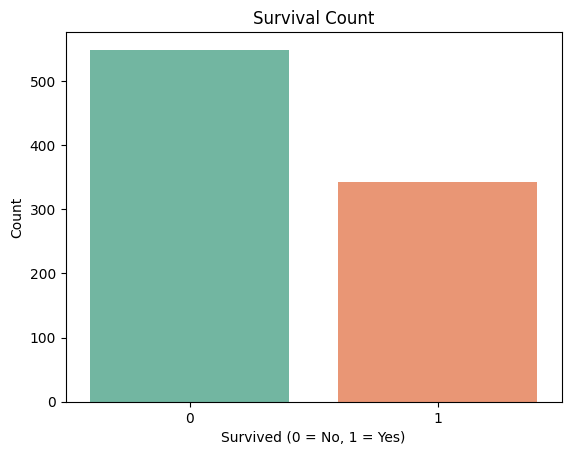

In [21]:
sns.countplot(data=titanic, x='survived', palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

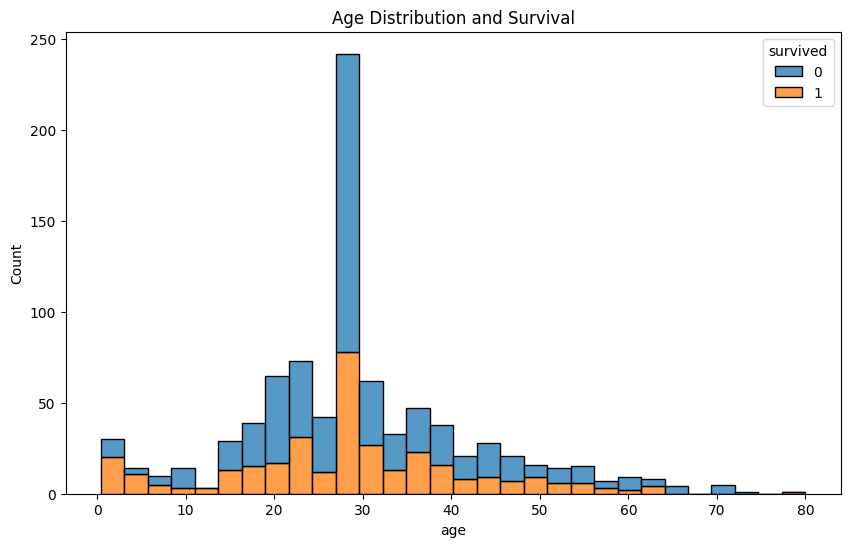

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', kde=False)
plt.title('Age Distribution and Survival')
plt.show()

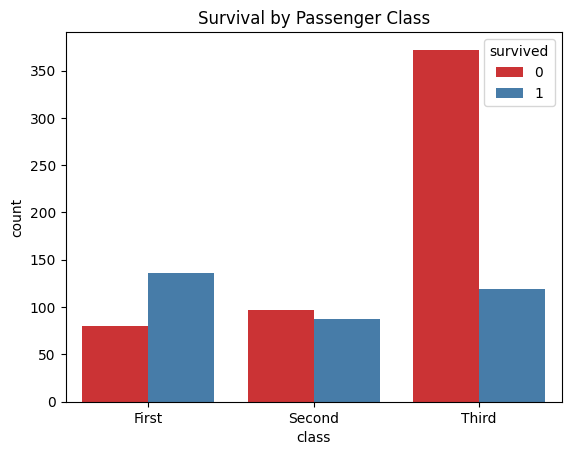

In [23]:
sns.countplot(data=titanic, x='class', hue='survived', palette='Set1')
plt.title('Survival by Passenger Class')
plt.show()

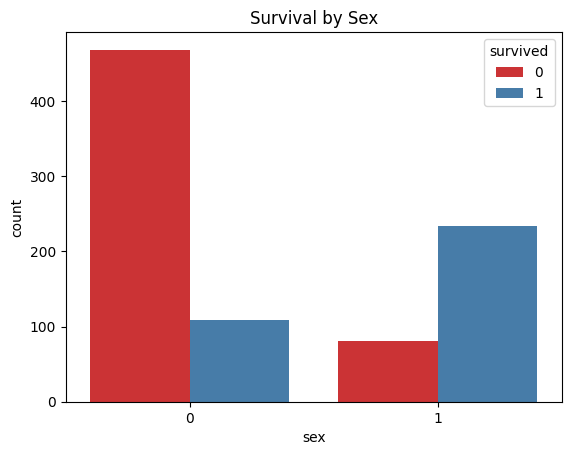

In [28]:
sns.countplot(data=titanic, x='sex', hue='survived', palette='Set1')
plt.title('Survival by Sex')
plt.show()

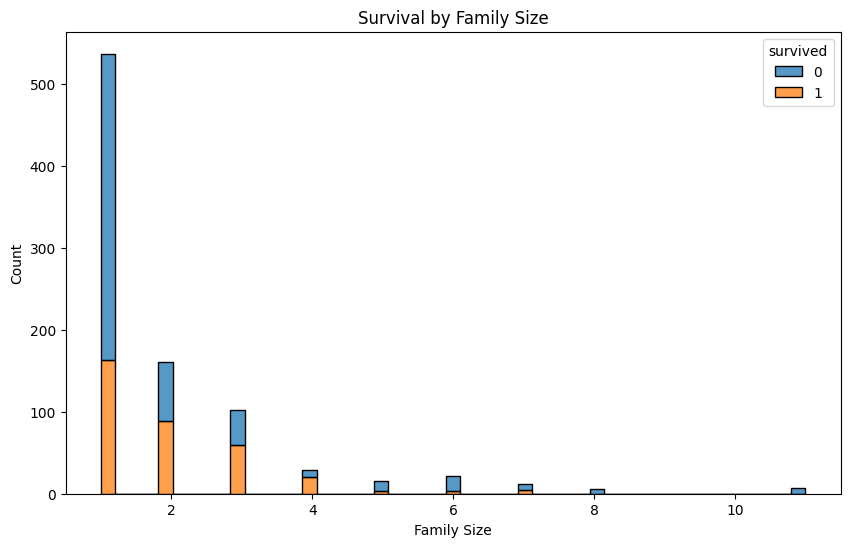

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='family_size', hue='survived', multiple='stack')
plt.title('Survival by Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

In [31]:
print(titanic.dtypes)

survived          int64
pclass            int64
sex               int64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
family_size       int64
dtype: object


In [32]:
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

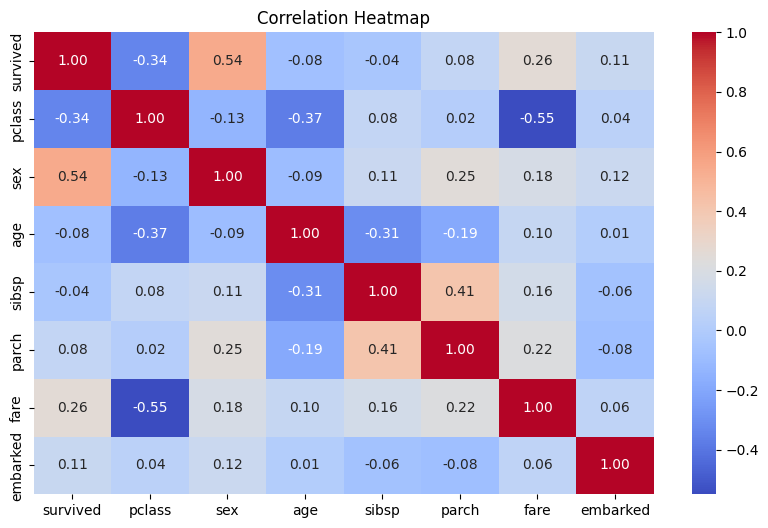

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset('titanic')

# Convert categorical columns to numeric where necessary
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select only numeric columns for correlation
titanic_numeric = titanic.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Summary of Insights**

*   Age: Younger passengers had a higher survival rate.
*   Class: First-class passengers had a better chance of survival compared
    to those in lower classes.
*   Sex: Females were more likely to survive than males.
*   Family Size: Larger family sizes may have reduced survival chances




